<a href="https://colab.research.google.com/github/Sylvia53/Portfolio/blob/main/Diabetes_EDA_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# 課程範例
>[kaggle:糖尿病預測資料集合]
>[來源網址](https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset)
>[程式筆記本](https://www.kaggle.com/code/youssefelbadry10/diabetes-classifier-eda-ml#)
---
## 實驗步驟
### 步驟一:概覽數據
### 步驟二:數據視覺化
## Troubleshooting（問題與解決方案）
### 問題一:性別跟糖尿病有關嗎?
### 問題二:影響糖尿病最多的因素是什麼?
### 總結:性別對糖尿病影像不大,影響最大的是血糖與糖化血色素


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix
from sklearn.svm import SVC
# import warnings
# warnings.filterwarnings("ignore")

sns.set_style('whitegrid')
df = pd.read_csv("/content/drive/MyDrive/團專檔案/diabetes_prediction_dataset/diabetes_prediction_dataset.csv")
df.head(10)


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
df.describe()


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


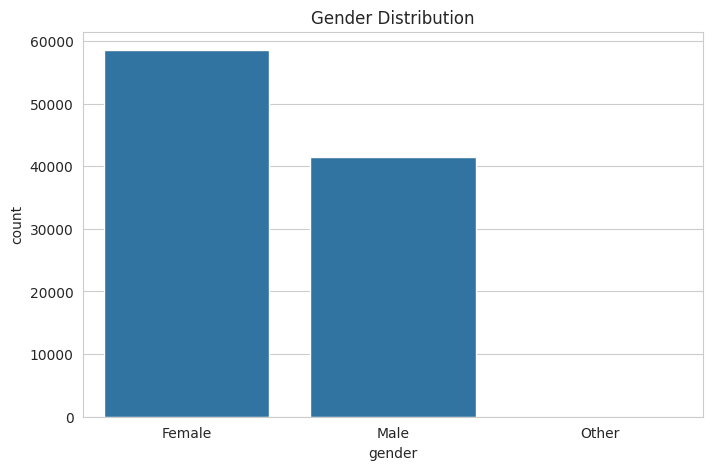

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='gender')
plt.title("Gender Distribution")
plt.show()

In [ ]:
df["gender"].value_counts()


,count
gender,
Female,58552
Male,41430
Other,18


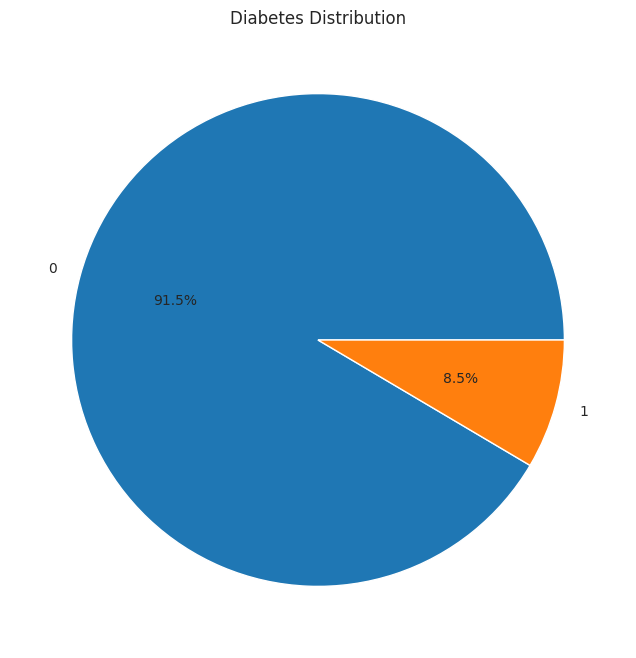

In [ ]:
diabetes_counts = df['diabetes'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(diabetes_counts, labels=diabetes_counts.index, autopct='%1.1f%%')
plt.title("Diabetes Distribution")
plt.show()

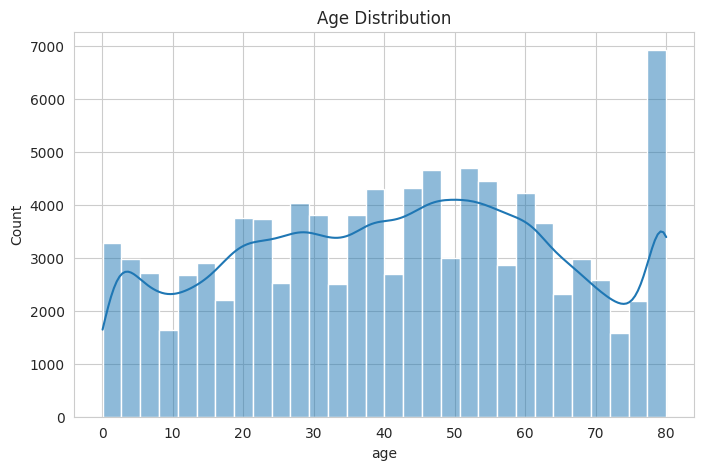

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='age', bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

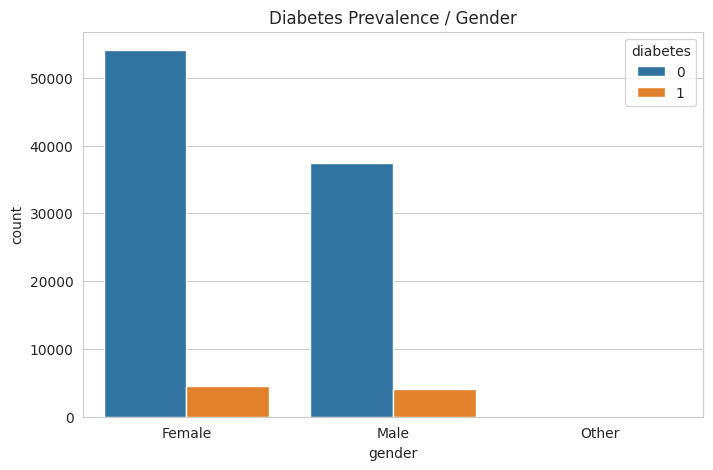

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='gender', hue='diabetes')
plt.title("Diabetes Prevalence / Gender")
plt.show()

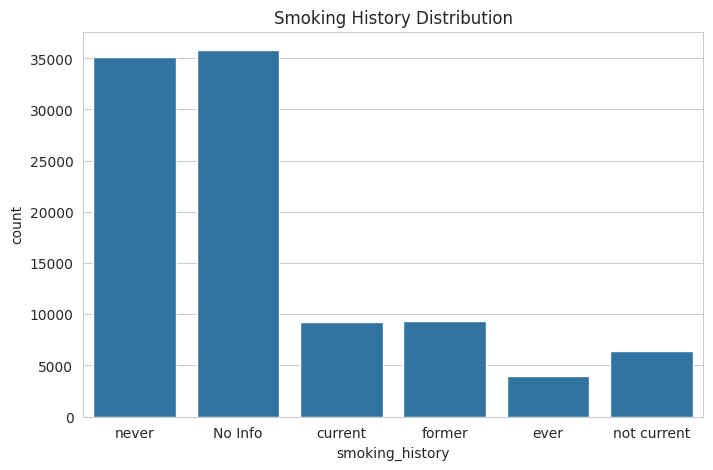

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='smoking_history')
plt.title("Smoking History Distribution")
plt.show()

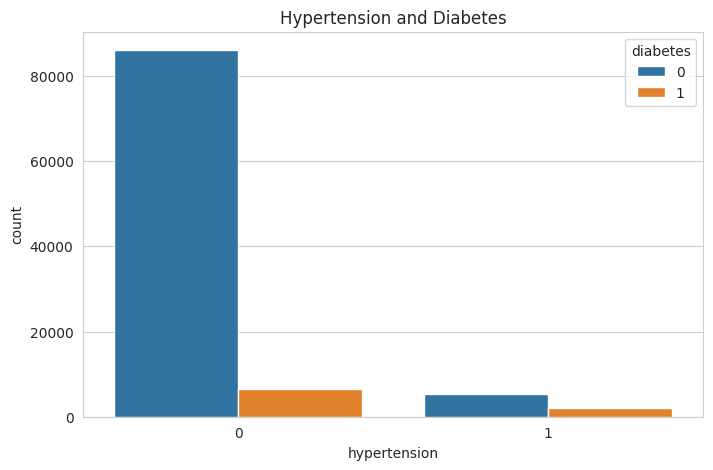

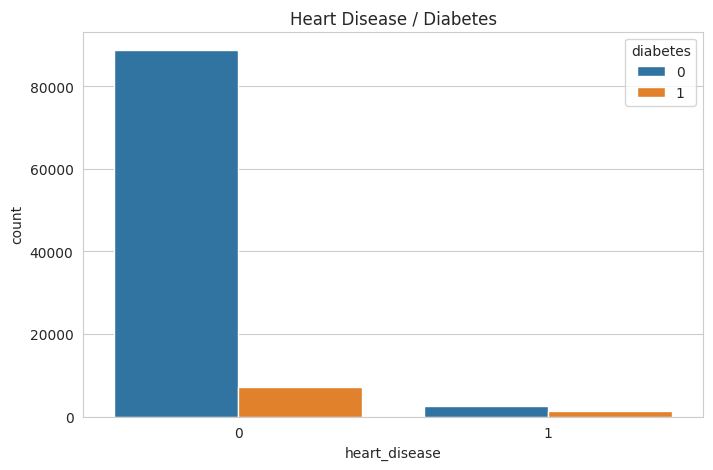

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='hypertension', hue='diabetes')
plt.title("Hypertension and Diabetes")
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='heart_disease', hue='diabetes')
plt.title("Heart Disease / Diabetes")
plt.show()

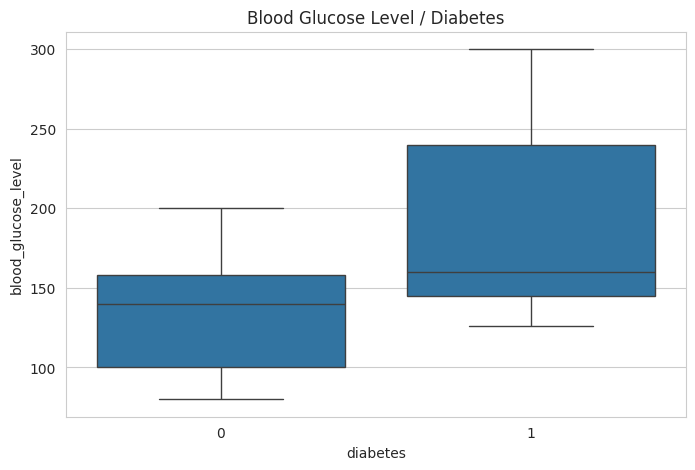

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='diabetes', y='blood_glucose_level')
plt.title("Blood Glucose Level / Diabetes")
plt.show()

In [ ]:
df["smoking_history"].value_counts()


,count
smoking_history,
No Info,35816
never,35095
former,9352
current,9286
not current,6447
ever,4004


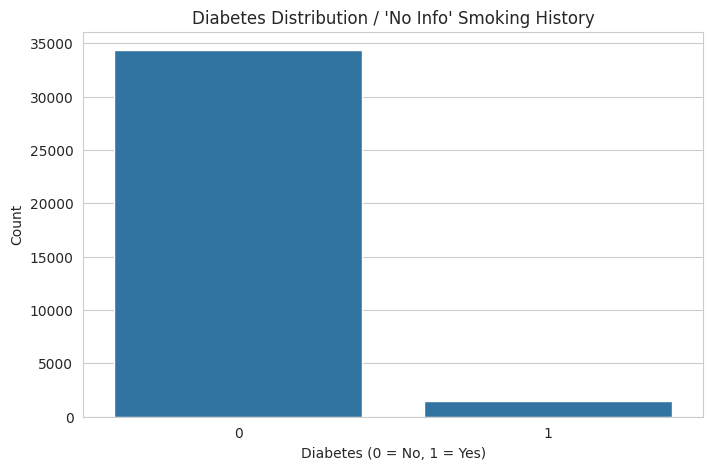

In [ ]:
no_info_diabetes = df[df['smoking_history'] == "No Info"]
plt.figure(figsize=(8, 5))
sns.countplot(data=no_info_diabetes, x='diabetes')
plt.title("Diabetes Distribution / 'No Info' Smoking History")
plt.xlabel("Diabetes (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

In [ ]:
df['smoking_history'] = df['smoking_history'].map({
    'No Info': 0,
    'never': 0,
    'former': 1,
    'current': 1,
    'not current': 1,
    'ever': 1
})

In [ ]:
df['gender'] = df['gender'].map({
    'Female': 0,
    'Other': 0,
    'Male': 1,
})

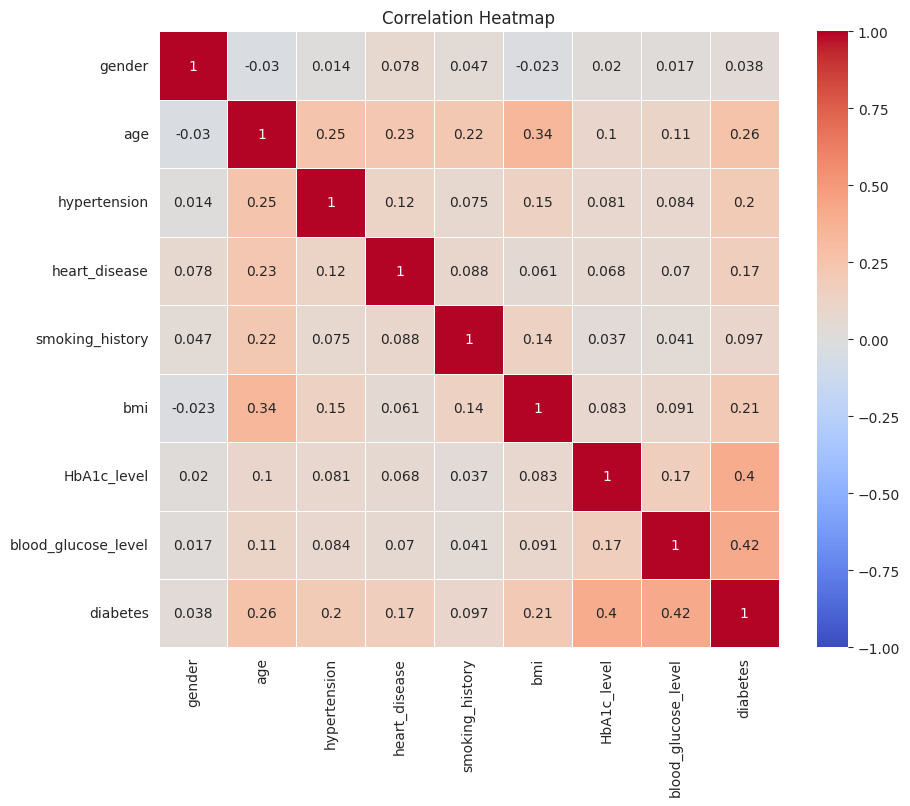

In [ ]:
corr_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# LogisticRegression

In [ ]:
X = df.drop(columns = ["diabetes"])
Y = df["diabetes"].values.reshape(-1, 1)

In [ ]:
Y.shape


(100000, 1)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state= 55)

In [ ]:
model = LogisticRegression()
model.fit(X_train, Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
model.score(X_train, Y_train)

0.95865

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print(accuracy_score(y_pred, Y_test))

0.96075


In [ ]:
print(mean_squared_error(y_pred, Y_test))

0.03925


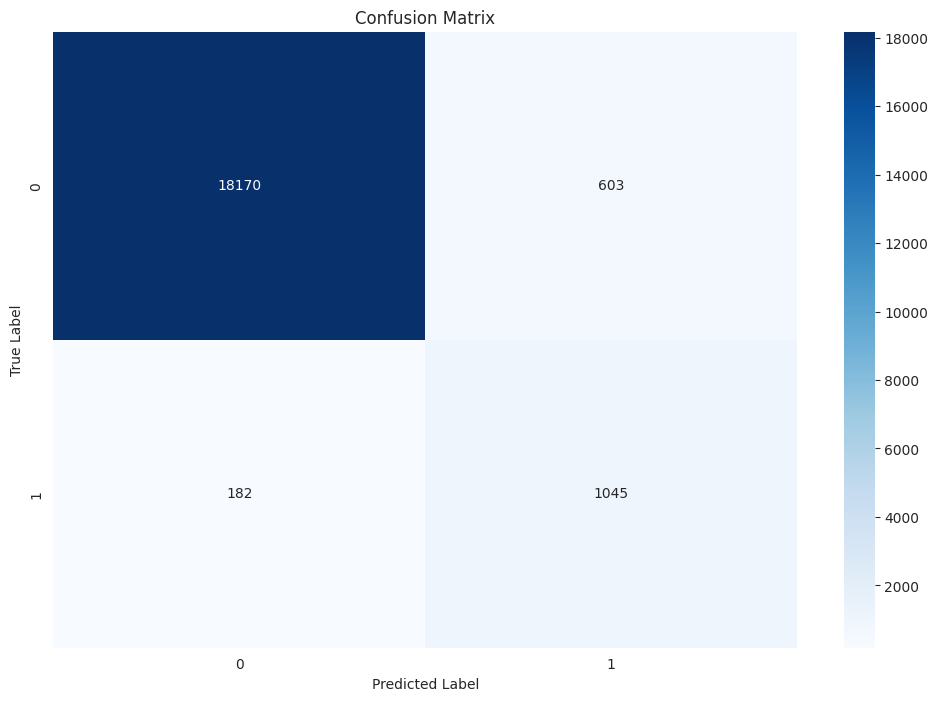

In [ ]:
cm = confusion_matrix(y_pred, Y_test)


plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()